## Part 2 : With Keras Library

In [1]:
## Import 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
# Keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
def loadIrisData():
    iris = load_iris()
    X=iris['data']
    t=iris['target']
    return X, t

In [3]:
def one_hot_encoding(t_indices, N):
    t_1hot = np.zeros((len(t_indices), N))
    for i in range(len(t_indices)) : t_1hot[i, t_indices[i]]=1
    return t_1hot

In [4]:
def splitData(X, t, testFraction=0.2):
    N = len(t)
    rand_indices = np.random.permutation(len(t))
    M = int(N*(1-testFraction))
    # Train Random
    train_rand_indices = rand_indices[:M]
    X_train = X[train_rand_indices]
    t_train = t[train_rand_indices]
    # Test Random
    test_rand_indices = rand_indices[M:]
    X_test = X[test_rand_indices]
    t_test = t[test_rand_indices]
    return X_train, t_train, X_test, t_test

In [5]:
def normalizeX(X_train, X_test):
    X_train_normalized = (X_train - X_train.mean(axis=0))/X_train.std(axis=0)
    X_test_normalized = (X_test - X_train.mean(axis=0))/X_train.std(axis=0)
    return X_train_normalized, X_test_normalized

In [6]:
## Confusion Matrix and Accuracy
def getCM(y, t):
    N = max(t)+1
    CM = np.zeros((N, N))   
    for i in range(t.shape[0]): CM[t[i], y[i]] += 1
    return CM
            
def getAccuracy(confusion_matrix):
    true = 0
    total = 0
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            if(i==j) : true+=confusion_matrix[i][i]
            total+=confusion_matrix[i][j]
    return true/total

In [7]:
# Load Iris Data
X, t = loadIrisData()
N = np.max(t)+1
t1hot = one_hot_encoding(t, N)
# Split into 20% Test Data, Normalize and One Hot
X_train, t_train, X_test, t_test = splitData(X, t, testFraction=0.2)
X_train_normalized, X_test_normalized = normalizeX(X_train, X_test)
t1hot_train = one_hot_encoding(t_train, N)
# print(t1hot_train)
t1hot_test = one_hot_encoding(t_test, N)
print(X_train.shape, t1hot_train.shape)

(120, 4) (120, 3)


In [8]:
## Categorical Cross Entropy
Cross_Entropy_Softmax_Model = Sequential()
Cross_Entropy_Softmax_Model.add(Dense(4, input_dim=4, activation='sigmoid'))
Cross_Entropy_Softmax_Model.add(Dense(3, activation='softmax'))
Cross_Entropy_Softmax_Model.summary()

# Fit Model
sgd = SGD(lr=0.01, decay=0, momentum=0.9, nesterov=False)
Cross_Entropy_Softmax_Model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
Epoch = 1000
History = Cross_Entropy_Softmax_Model.fit(X_train_normalized, t1hot_train, epochs=Epoch, 
                                          verbose=0, batch_size=32)

epochs = [k for k in range(Epoch)]
losses = History.history['loss']

W0913 00:06:57.747652 4565378496 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0913 00:06:57.768240 4565378496 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0913 00:06:57.771930 4565378496 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0913 00:06:57.840101 4565378496 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0913 00:06:57.849029 4565378496 deprecation_wrapper.py:119] From /anaconda3

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


W0913 00:06:57.970849 4565378496 deprecation.py:323] From /anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0913 00:06:58.105026 4565378496 deprecation_wrapper.py:119] From /anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Confusion Matrix : 
[[11.  0.  0.]
 [ 0.  7.  0.]
 [ 0.  1. 11.]]
Accuracy :  0.9666666666666667


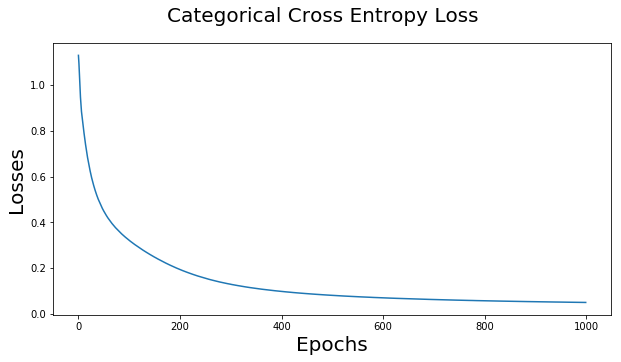

In [9]:
# Plot Loss versus Epochs
figure = plt.figure(figsize=(10, 5))
plt.plot(epochs, losses)
figure.suptitle('Categorical Cross Entropy Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Losses', fontsize=20)
    
# Print Confusion matrix
y1hot_test = Cross_Entropy_Softmax_Model.predict(X_test_normalized)
y_test = np.argmax(y1hot_test.T, axis=0)
# print(t_test, y_test)
confusion_matrix = getCM(y_test, t_test)
print("Confusion Matrix : ") 
print(confusion_matrix)
print("Accuracy : ", getAccuracy(confusion_matrix))

In [10]:
## Mean Squared
Mean_Squared_Sigmoid_Model = Sequential()
Mean_Squared_Sigmoid_Model.add(Dense(4, input_dim=4, activation='sigmoid'))
Mean_Squared_Sigmoid_Model.add(Dense(3, activation='sigmoid'))
Mean_Squared_Sigmoid_Model.summary()

# Fit Model
sgd = SGD(lr=0.01, decay=0, momentum=0.9, nesterov=False)
Mean_Squared_Sigmoid_Model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
Epoch = 1000
History = Mean_Squared_Sigmoid_Model.fit(X_train_normalized, t1hot_train, epochs=Epoch, 
                                         verbose=0, batch_size=32)

epochs = [k for k in range(Epoch)]
losses = History.history['loss']

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


Confusion Matrix : 
[[11.  0.  0.]
 [ 0.  6.  1.]
 [ 0.  1. 11.]]
Accuracy :  0.9333333333333333


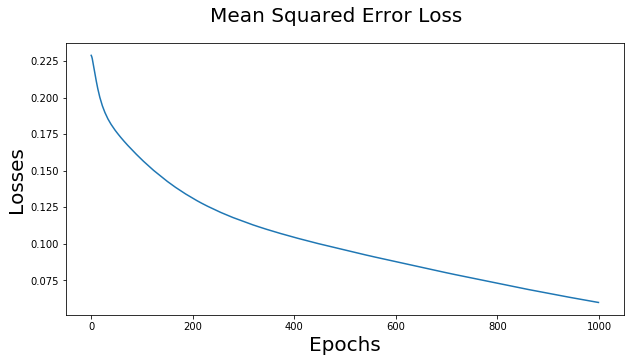

In [11]:
# Plot Loss versus Epochs
figure = plt.figure(figsize=(10, 5))
plt.plot(epochs, losses)
figure.suptitle('Mean Squared Error Loss', fontsize=20)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Losses', fontsize=20)
    
# Print Confusion matrix
y1hot_test = Mean_Squared_Sigmoid_Model.predict(X_test_normalized)
y_test = np.argmax(y1hot_test.T, axis=0)
# print(t_test, y_test)
confusion_matrix = getCM(y_test, t_test)
print("Confusion Matrix : ") 
print(confusion_matrix)
print("Accuracy : ", getAccuracy(confusion_matrix))